2021-11-30 ~ 2023-12-01 까지 2년치 매일 30건씩

주차로 묶어서 시각화

# Figure 1(Difficulty)

In [1]:
import sys, os
p = os.path.abspath('..')
pp = os.path.abspath('../..')
sys.path.insert(1, p)
sys.path.insert(1, pp)

In [2]:
import pandas as pd
import re
import numpy as np
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import lib.stats.stats as st
import lib.annotation.Result_Prep as rp
import config.config as conf
import matplotlib as mpl
import matplotlib.lines as mlines


INFO 10-22 09:28:51 [__init__.py:216] Automatically detected platform cuda.


In [3]:
from matplotlib import font_manager
import matplotlib as mpl
from matplotlib import font_manager as fm

# 설치된 폰트 이름과 경로 확인
for font in font_manager.fontManager.ttflist:
    if 'Helvetica' in font.name: # 'Nanum' 대신 원하는 글꼴의 일부를 입력하여 검색할 수 있습니다.
        print(font.name, font.fname)

# 직접 경로로 Helvetica 폰트 불러오기
font_path = "/System/Library/Fonts/Helvetica.ttc"
font_prop = fm.FontProperties(fname=font_path)
# font_name = font_prop.get_name()
# print(f"Registered font name: {font_name}")

mpl.rcParams['font.family'] = 'Helvetica'


Helvetica /home/mghan/.fonts/Helvetica/Helvetica.ttf
HelveticaRounded-Black /home/mghan/.fonts/Helvetica/Helvetica Rounded Black Oblique.ttf
Helvetica /home/mghan/.fonts/Helvetica/Helvetica Oblique.ttf
Helvetica-CondensedLight /home/mghan/.fonts/Helvetica/Helvetica Condensed Light Oblique.ttf
Helvetica Narrow /home/mghan/.fonts/Helvetica/Helvetica Narrow Bold.ttf
Helvetica83-ExtendedHeavy /home/mghan/.fonts/Helvetica/Helvetica Extended Heavy.ttf
Helvetica-Compressed /home/mghan/.fonts/Helvetica/Helvetica Compressed.ttf
HelveticaRounded-Condensed /home/mghan/.fonts/Helvetica/Helvetica Rounded Condensed Bold Oblique.ttf
Helvetica Narrow /home/mghan/.fonts/Helvetica/Helvetica Narrow Bold Oblique.ttf
Helvetica-Condensed /home/mghan/.fonts/Helvetica/Helvetica Condensed Oblique.ttf
Helvetica-Black /home/mghan/.fonts/Helvetica/Helvetica Black Oblique.ttf
Helvetica-Narrow-Bold Lefty /home/mghan/.fonts/Helvetica/Helvetica Narrow Bold Lefty.ttf
HelveticaFractions /home/mghan/.fonts/Helvetica/Hel

In [4]:
path = f'../LLM/result/'
file_list = os.listdir(path)

In [5]:
r_p = rp.Result_Prep()

In [6]:
ver_list = sorted([y for y in [x for x in file_list if x.isdigit()] if (int(y)>=11110000) & (int(y)<=98880000)])

In [7]:
print(ver_list)

['11110000']


In [8]:
tot_calc = pd.DataFrame()
for listid in ver_list:
    df = r_p.make_one_file(listid)
    if isinstance(df, pd.core.frame.DataFrame):
        df = r_p.pp_df(df, 5)
        df = r_p.calc_rate_byweek(df)
        tot_calc = pd.concat([tot_calc, df], axis = 0)

    

In [9]:
tot_calc.tail()

,rel_week,o_result,r_cnt,tot_cnt,rate
312,51.0,0,19,137,13.868613
314,51.0,2,39,137,28.467153
317,52.0,2,27,98,27.551020
316,52.0,1,43,98,43.877551
315,52.0,0,28,98,28.571429


In [10]:
tot_calc.info()

<class 'pandas.core.frame.DataFrame'>
Index: 318 entries, 0 to 315
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   rel_week  318 non-null    float64
 1   o_result  318 non-null    object 
 2   r_cnt     318 non-null    int64  
 3   tot_cnt   318 non-null    int64  
 4   rate      318 non-null    float64
dtypes: float64(2), int64(2), object(1)
memory usage: 14.9+ KB


In [11]:
m_chk_cnt_0 = tot_calc[tot_calc['o_result'] =='0']
m_chk_cnt_1 = tot_calc[tot_calc['o_result'] =='1']
m_chk_cnt_2 = tot_calc[tot_calc['o_result'] =='2']

In [12]:
m_chk_cnt_0.info()

<class 'pandas.core.frame.DataFrame'>
Index: 106 entries, 0 to 315
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   rel_week  106 non-null    float64
 1   o_result  106 non-null    object 
 2   r_cnt     106 non-null    int64  
 3   tot_cnt   106 non-null    int64  
 4   rate      106 non-null    float64
dtypes: float64(2), int64(2), object(1)
memory usage: 5.0+ KB


In [13]:
print(m_chk_cnt_0.loc[m_chk_cnt_0['o_result'].isna(), 'rate'])
print(m_chk_cnt_1.loc[m_chk_cnt_1['o_result'].isna(), 'rate'])
print(m_chk_cnt_2.loc[m_chk_cnt_2['o_result'].isna(), 'rate'])

Series([], Name: rate, dtype: float64)
Series([], Name: rate, dtype: float64)
Series([], Name: rate, dtype: float64)


In [14]:
m_chk_cnt_0.loc[:, 'o_result'] = '0'
m_chk_cnt_1.loc[:, 'o_result'] = '1'
m_chk_cnt_2.loc[:, 'o_result'] = '2'

In [15]:
m_chk_cnt_0.head()
# m_chk_cnt_2[m_chk_cnt_2['rel_days'].isna()]

,rel_week,o_result,r_cnt,tot_cnt,rate
0,-53.0,0,4,20,20.000000
3,-52.0,0,41,136,30.147059
6,-51.0,0,34,149,22.818792
9,-50.0,0,34,137,24.817518
12,-49.0,0,39,136,28.676471


In [16]:
st_0 = st.Stats(m_chk_cnt_0['rel_week'].values, m_chk_cnt_0['rate'].values, 2, 0.95)
st_1 = st.Stats(m_chk_cnt_1['rel_week'].values, m_chk_cnt_1['rate'].values, 2, 0.95)
st_2 = st.Stats(m_chk_cnt_2['rel_week'].values, m_chk_cnt_2['rate'].values, 2, 0.95)

In [17]:
F_stat_0, p_value_0 = st_0.chow_test()
F_stat_1, p_value_1 = st_1.chow_test()
F_stat_2, p_value_2 = st_2.chow_test()

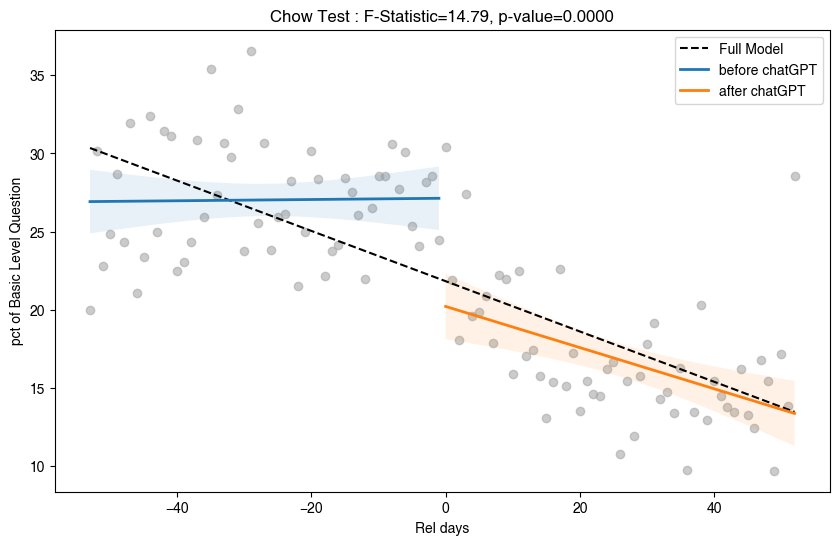

In [18]:
x_0 = m_chk_cnt_0['rel_week'].values
y_0 = m_chk_cnt_0['rate'].values

split_idx = np.argmax(np.where(x_0 < 0))+1
x_0_1= x_0[:split_idx]
x_0_2= x_0[split_idx:]
# 시각화

plt.figure(figsize=(10, 6))
plt.scatter(x_0, y_0,  alpha=0.6, color='darkgray')
plt.plot(x_0, st_0.y_predict, label="Full Model", linestyle="--", color="black")  


plt.plot(x_0_1, st_0.y1_predict, label="before chatGPT", linewidth='2')
plt.fill_between(x_0_1, st_0.y1_predict - st_0.y1_conf_interval, st_0.y1_predict + st_0.y1_conf_interval, alpha=0.1)

plt.plot(x_0_2, st_0.y2_predict, label="after chatGPT", linewidth='2')
plt.fill_between(x_0_2, st_0.y2_predict - st_0.y2_conf_interval, st_0.y2_predict + st_0.y2_conf_interval, alpha=0.1)


plt.legend()
plt.title(f"Chow Test : F-Statistic={F_stat_0:.2f}, p-value={p_value_0:.4f}")
plt.xlabel("Rel days")
plt.ylabel("pct of Basic Level Question")
plt.show()


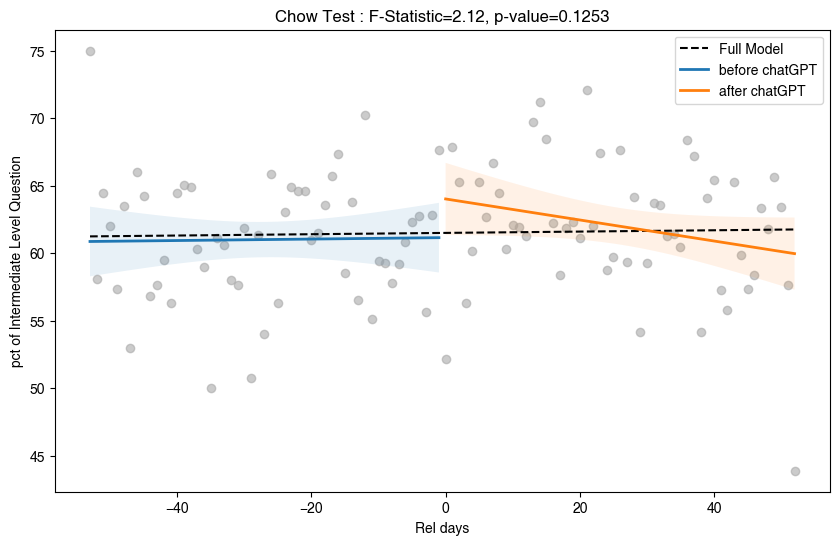

In [19]:
x_1 = m_chk_cnt_1['rel_week'].values
y_1 = m_chk_cnt_1['rate'].values

split_idx = np.argmax(np.where(x_1 < 0))+1
x_1_1 = x_1[:split_idx]
x_1_2 = x_1[split_idx:]
# 시각화
plt.figure(figsize=(10, 6))
plt.scatter(x_1, y_1,  alpha=0.6, color='darkgray')
plt.plot(x_1, st_1.y_predict, label="Full Model", linestyle="--", color="black")  


plt.plot(x_1_1, st_1.y1_predict, label="before chatGPT", linewidth='2')
plt.fill_between(x_1_1, st_1.y1_predict - st_1.y1_conf_interval, st_1.y1_predict + st_1.y1_conf_interval, alpha=0.1)

plt.plot(x_1_2, st_1.y2_predict, label="after chatGPT", linewidth='2')
plt.fill_between(x_1_2, st_1.y2_predict - st_1.y2_conf_interval, st_1.y2_predict + st_1.y2_conf_interval, alpha=0.1)


plt.legend()
plt.title(f"Chow Test : F-Statistic={F_stat_1:.2f}, p-value={p_value_1:.4f}")
plt.xlabel("Rel days")
plt.ylabel("pct of Intermediate Level Question")
plt.show()


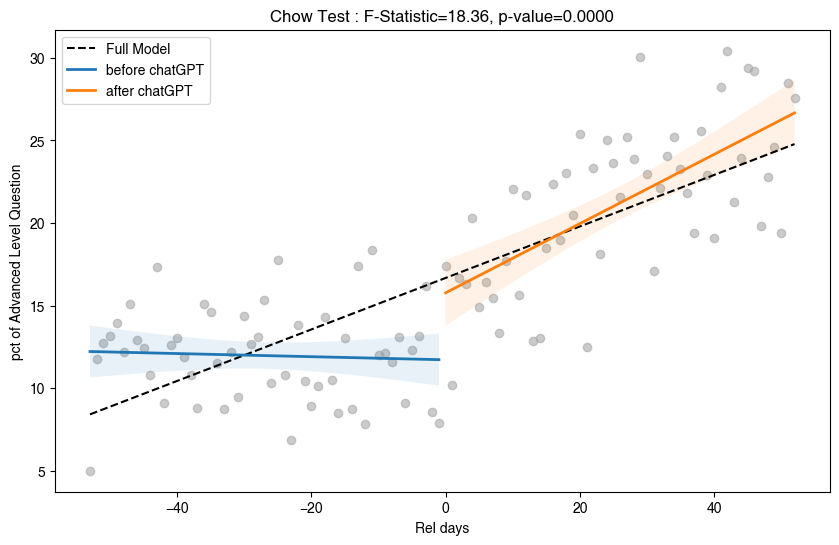

In [20]:
x_2 = m_chk_cnt_2['rel_week'].values
y_2 = m_chk_cnt_2['rate'].values

split_idx = np.argmax(np.where(x_2 < 0))+1
x_2_1 = x_2[:split_idx]
x_2_2 = x_2[split_idx:]
# 시각화
plt.figure(figsize=(10, 6))
plt.scatter(x_2, y_2,  alpha=0.6, color='darkgray')
plt.plot(x_2, st_2.y_predict, label="Full Model", linestyle="--", color="black")  


plt.plot(x_2_1, st_2.y1_predict, label="before chatGPT", linewidth='2')
plt.fill_between(x_2_1, st_2.y1_predict - st_2.y1_conf_interval, st_2.y1_predict + st_2.y1_conf_interval, alpha=0.1)

plt.plot(x_2_2, st_2.y2_predict, label="after chatGPT", linewidth='2')
plt.fill_between(x_2_2, st_2.y2_predict - st_2.y2_conf_interval, st_2.y2_predict + st_2.y2_conf_interval, alpha=0.1)


plt.legend()
plt.title(f"Chow Test : F-Statistic={F_stat_2:.2f}, p-value={p_value_2:.4f}")
plt.xlabel("Rel days")
plt.ylabel("pct of Advanced Level Question")
plt.show()


# Figure(Code Complexity)

In [21]:
import sys, os
p = os.path.abspath('..')
pp = os.path.abspath('../..')
sys.path.insert(1, p)
sys.path.insert(1, pp)

In [22]:
#customized preprocessing pkg
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
import datetime
import lib.stats.stats as st
import config.config as conf

### 소스코드 complexity 계산

In [23]:
input_year_list = ['2021', '2022', '2023']

In [24]:
input_pl = 'python'

In [25]:
# 파일 불러오기
complexity_python_df = pd.DataFrame()

for input_year in input_year_list : 
    with open(f'{conf.DATA_PATH}/data/complexity_{input_pl}_df_{input_year}.pkl', 'rb') as f:
        tmp = pickle.load(f)
        complexity_python_df = pd.concat([complexity_python_df, tmp], axis = 0)

In [26]:
print(complexity_python_df['cdate'].min())
print(complexity_python_df['cdate'].max())

2021-01-01
2023-12-03


In [27]:
# 전체 데이터셋 
with open(f'{conf.DATA_PATH}/data/complexity_src_df.pkl', 'rb') as f:
    src_df = pickle.load(f)

In [28]:
src_df.head()

,idx,id,src
0,19455,77167050,import ipywidgets as widgets\n\nquestion_label...
1,19456,77167055,"`from transformers import AutoTokenizer, AutoM..."
2,19457,77167055,error: TODO: expressions are not yet supported...
3,19458,77167101,"sql1 = ""SELECT state FROM YO WHERE function = ..."
4,19459,77167156,ldata1x\nldata2x\nldata3x\nldata4x\n


In [29]:
# 파일 불러오기
calc_com_df = pd.DataFrame()

for input_year in input_year_list : 
    with open(f'{conf.DATA_PATH}/data/calc_com_df_{input_year}_{input_pl}.pkl', 'rb') as f:
        tmp = pickle.load(f)
        calc_com_df = pd.concat([calc_com_df, tmp], axis = 0)

In [30]:
calc_com_df.reset_index(drop=True, inplace=True)

In [31]:
calc_com_df.head()

,Path,File Name,Cognitive Complexity
0,353900_65948963.py,353900_65948963.py,3
1,377254_65638981.py,377254_65638981.py,0
2,94558_69251293.py,94558_69251293.py,0
3,223504_67683129.py,223504_67683129.py,0
4,111551_69022973.py,111551_69022973.py,0


In [32]:
calc_com_df['idx'] = calc_com_df['Path'].apply(lambda x : x.split('_')[0])
# calc_com_df['Path'].apply(lambda x : [  for i in x.split('_')])

In [33]:
calc_com_df['id'] = calc_com_df['Path'].apply(lambda x : x.split('_')[1].split('.')[0])

In [34]:
calc_com_df.sort_values(by = ['idx', 'id'])

,Path,File Name,Cognitive Complexity,idx,id
164589,0_70702244.py,0_70702244.py,0,0,70702244
363420,0_74935859.py,0_74935859.py,1,0,74935859
67043,1_70397890.py,1_70397890.py,0,1,70397890
230047,1_74574281.py,1_74574281.py,6,1,74574281
427921,1_77569752.py,1_77569752.py,0,1,77569752
...,...,...,...,...,...
274042,99997_73587690.py,99997_73587690.py,6,99997,73587690
407696,99997_76005895.py,99997_76005895.py,0,99997,76005895
155471,99999_69208993.py,99999_69208993.py,0,99999,69208993
335421,99999_73587727.py,99999_73587727.py,1,99999,73587727


In [35]:
calc_com_df[['idx', 'id', 'Cognitive Complexity']] = calc_com_df[['idx', 'id', 'Cognitive Complexity']].astype('int')

In [36]:
src_df[['idx', 'id']] = src_df[['idx', 'id']].astype('int')

In [37]:
calc_com_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 482331 entries, 0 to 482330
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   Path                  482331 non-null  object
 1   File Name             482331 non-null  object
 2   Cognitive Complexity  482331 non-null  int64 
 3   idx                   482331 non-null  int64 
 4   id                    482331 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 18.4+ MB


In [38]:
src_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1266624 entries, 0 to 1266623
Data columns (total 3 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   idx     1266624 non-null  int64 
 1   id      1266624 non-null  int64 
 2   src     1266624 non-null  object
dtypes: int64(2), object(1)
memory usage: 29.0+ MB


In [39]:
calc_com_df = pd.merge(src_df,  calc_com_df, how = 'left', on = ['idx', 'id'])

In [40]:
calc_com_df = pd.merge(complexity_python_df[['id', 'cdate']], calc_com_df, on = 'id')

In [41]:
calc_com_df.head()

,id,cdate,idx,src,Path,File Name,Cognitive Complexity
0,70702244,2021-12-28,0,cmd = r'yes y | makepkg -si'\noutput = subproc...,0_70702244.py,0_70702244.py,0.0
1,70542818,2021-12-31,113,import Conv\nfrom os import getcwd\nfrom time ...,113_70542818.py,113_70542818.py,0.0
2,70542928,2021-12-31,114,def fib(n):\n import numpy as np\n matri...,NaN,NaN,NaN
3,70542928,2021-12-31,115,4346655768693745643568852767504062580256466051...,115_70542928.py,115_70542928.py,0.0
4,70542928,2021-12-31,116,817770325994397771\n,116_70542928.py,116_70542928.py,0.0


In [42]:
# 일자별로 아예 소스가 수행되지 않는 건 
calc_com_df_back = calc_com_df.copy()
calc_ed_com_df = calc_com_df[~calc_com_df['Path'].isna()]

In [43]:
# calc_ed_com_df = calc_ed_com_df.sort_values(by = ['cdate', 'id', 'Cognitive Complexity'], ascending = [True, True, False]).groupby('id').head(1)

In [44]:
with open(f'{conf.DATA_PATH}/data/cc_python_raw_df.pkl', 'wb') as f:
    pickle.dump(calc_ed_com_df, f)

In [45]:
calc_ed_com_df

,id,cdate,idx,src,Path,File Name,Cognitive Complexity
0,70702244,2021-12-28,0,cmd = r'yes y | makepkg -si'\noutput = subproc...,0_70702244.py,0_70702244.py,0.0
1,70542818,2021-12-31,113,import Conv\nfrom os import getcwd\nfrom time ...,113_70542818.py,113_70542818.py,0.0
3,70542928,2021-12-31,115,4346655768693745643568852767504062580256466051...,115_70542928.py,115_70542928.py,0.0
4,70542928,2021-12-31,116,817770325994397771\n,116_70542928.py,116_70542928.py,0.0
6,70543017,2021-12-31,118,"data = func(""value"")\nassert all(""Yes"" in data...",118_70543017.py,118_70543017.py,0.0
...,...,...,...,...,...,...,...
940792,77356328,2023-10-25,13707,import fitz # PyMuPDF library\nimport tkinter...,13707_77356328.py,13707_77356328.py,0.0
940795,77356332,2023-10-25,13710,from datetime import datetime\nimport pandas a...,13710_77356332.py,13710_77356332.py,0.0
940798,77356352,2023-10-25,13713,"import re\nre.match(r'^-?\d{1,3}[,.](\d{3}[,.]...",13713_77356352.py,13713_77356352.py,0.0
940799,77356372,2023-10-25,13714,"from tkinter import Tk, Canvas, Button, Checkb...",13714_77356372.py,13714_77356372.py,2.0


In [46]:
calc_ed_com_df

,id,cdate,idx,src,Path,File Name,Cognitive Complexity
0,70702244,2021-12-28,0,cmd = r'yes y | makepkg -si'\noutput = subproc...,0_70702244.py,0_70702244.py,0.0
1,70542818,2021-12-31,113,import Conv\nfrom os import getcwd\nfrom time ...,113_70542818.py,113_70542818.py,0.0
3,70542928,2021-12-31,115,4346655768693745643568852767504062580256466051...,115_70542928.py,115_70542928.py,0.0
4,70542928,2021-12-31,116,817770325994397771\n,116_70542928.py,116_70542928.py,0.0
6,70543017,2021-12-31,118,"data = func(""value"")\nassert all(""Yes"" in data...",118_70543017.py,118_70543017.py,0.0
...,...,...,...,...,...,...,...
940792,77356328,2023-10-25,13707,import fitz # PyMuPDF library\nimport tkinter...,13707_77356328.py,13707_77356328.py,0.0
940795,77356332,2023-10-25,13710,from datetime import datetime\nimport pandas a...,13710_77356332.py,13710_77356332.py,0.0
940798,77356352,2023-10-25,13713,"import re\nre.match(r'^-?\d{1,3}[,.](\d{3}[,.]...",13713_77356352.py,13713_77356352.py,0.0
940799,77356372,2023-10-25,13714,"from tkinter import Tk, Canvas, Button, Checkb...",13714_77356372.py,13714_77356372.py,2.0


In [47]:
calc_ed_com_df['rel_week'] = np.floor((pd.to_datetime(calc_ed_com_df['cdate'])- datetime.datetime(2022,11,30)).dt.days/7)


In [48]:
calc_ed_com_df[(calc_ed_com_df['rel_week']>=-52)&(calc_ed_com_df['rel_week']<52)].info()

<class 'pandas.core.frame.DataFrame'>
Index: 293704 entries, 0 to 940800
Data columns (total 8 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    293704 non-null  int64  
 1   cdate                 293704 non-null  object 
 2   idx                   293704 non-null  int64  
 3   src                   293704 non-null  object 
 4   Path                  293704 non-null  object 
 5   File Name             293704 non-null  object 
 6   Cognitive Complexity  293704 non-null  float64
 7   rel_week              293704 non-null  float64
dtypes: float64(2), int64(2), object(4)
memory usage: 20.2+ MB


In [49]:
calc_ed_com_mean_df = calc_ed_com_df.groupby(['rel_week']).mean(numeric_only=True).reset_index()
# ['Cognitive Complexity']

In [50]:
calc_ed_com_mean_df.head()

,rel_week,id,idx,Cognitive Complexity
0,-100.0,6.555671e+07,390480.428283,1.130909
1,-99.0,6.564128e+07,379233.726323,1.047586
2,-98.0,6.574825e+07,384568.220445,1.087390
3,-97.0,6.585632e+07,367778.865407,0.901617
4,-96.0,6.596760e+07,355703.084840,0.979995


In [51]:
chow_df = calc_ed_com_mean_df[['rel_week', 'Cognitive Complexity']]

In [52]:
chow_df = chow_df[(chow_df['rel_week']>=-52)&(chow_df['rel_week']<52)]

In [53]:
x = chow_df['rel_week'].values

In [54]:
np.argmax(np.where(x <= 0)) 

np.int64(52)

In [55]:
chow_df_1year = chow_df[chow_df['rel_week']>=-52]
st_chow_1year = st.Stats(chow_df_1year['rel_week'].values, chow_df_1year['Cognitive Complexity'].values, 2, 0.95)
F_stat_1, p_value_1 = st_chow_1year.chow_test()


In [56]:
np.argmax(np.where(x < 0))

np.int64(51)

In [57]:
x[:51]

array([-52., -51., -50., -49., -48., -47., -46., -45., -44., -43., -42.,
       -41., -40., -39., -38., -37., -36., -35., -34., -33., -32., -31.,
       -30., -29., -28., -27., -26., -25., -24., -23., -22., -21., -20.,
       -19., -18., -17., -16., -15., -14., -13., -12., -11., -10.,  -9.,
        -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.])

In [58]:
x = chow_df_1year['rel_week'].values
y = chow_df_1year['Cognitive Complexity'].values

split_idx = np.argmax(np.where(x < 0))+1
x1= x[:split_idx]
x2= x[split_idx:]

# draw graph

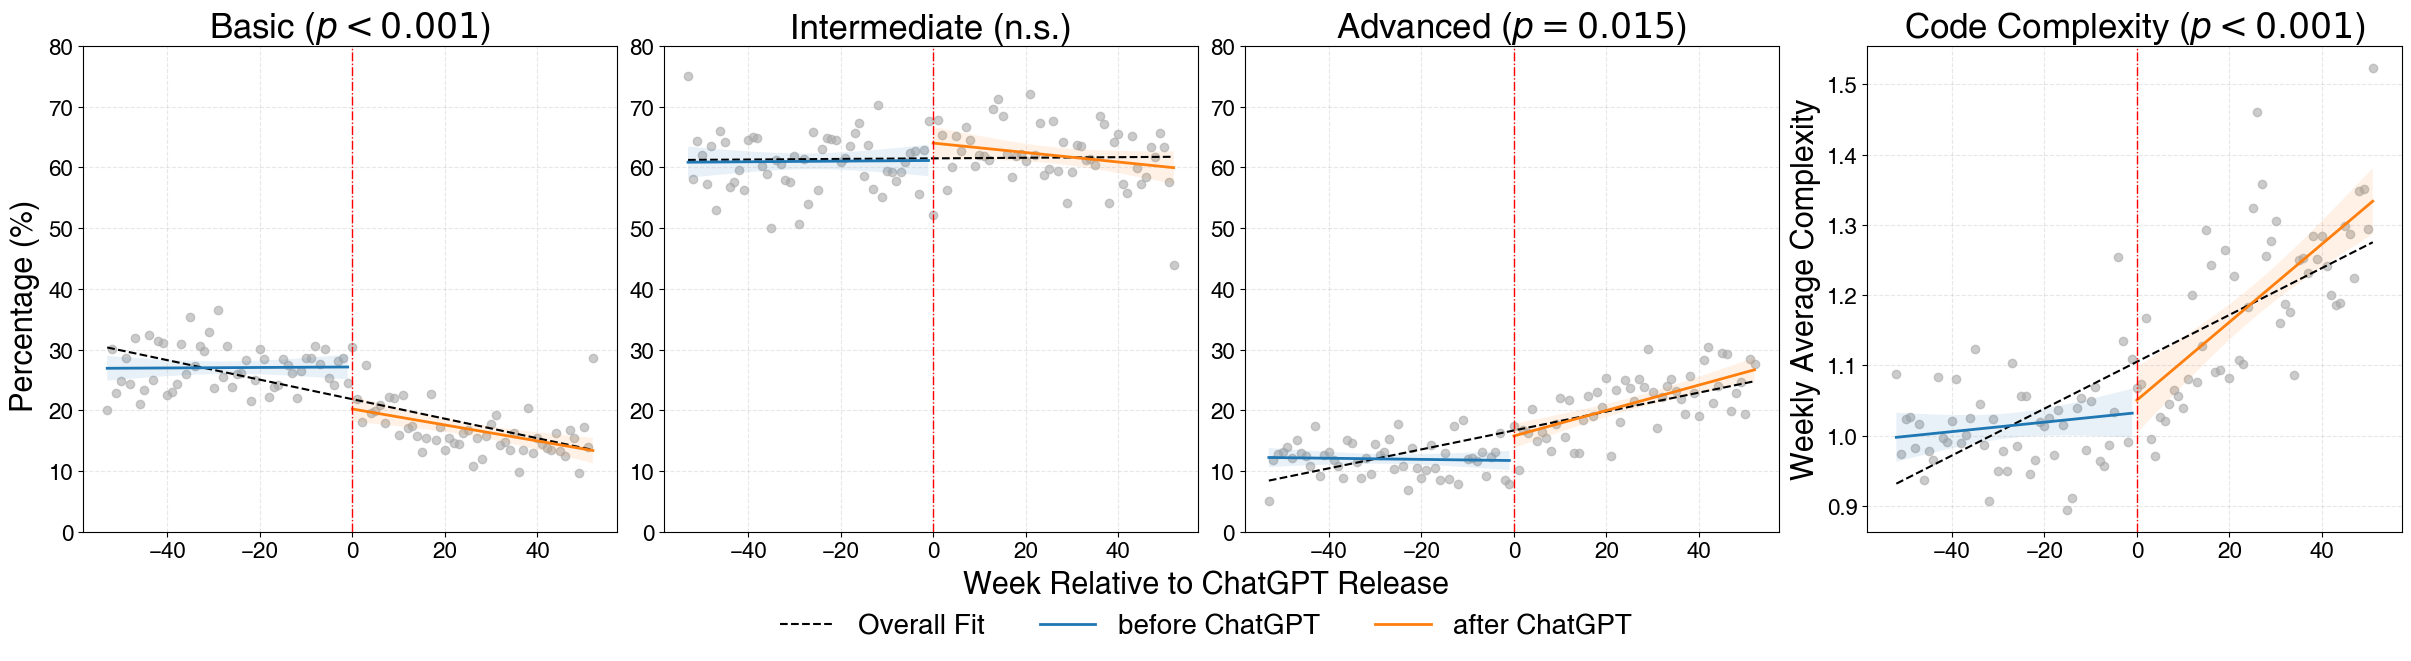

In [59]:
### create a figure with multiple subplots
sharey = True ## 또는 sharey=False
sharex = True ## 또는 sharex=False

fig, axs = plt.subplots(1, 4, figsize = (24, 6), sharex=sharex, constrained_layout=True)


axs[0].scatter(x_0, y_0,  alpha=0.6, color='darkgray')
axs[0].plot(x_0, st_0.y_predict, label="Overall Fit", linestyle="--", color="black")  
axs[0].plot(x_0_1, st_0.y1_predict, label="before ChatGPT", linewidth='2')
axs[0].fill_between(x_0_1, st_0.y1_predict - st_0.y1_conf_interval, st_0.y1_predict + st_0.y1_conf_interval, alpha=0.1)
axs[0].plot(x_0_2, st_0.y2_predict, label="after ChatGPT", linewidth='2')
axs[0].fill_between(x_0_2, st_0.y2_predict - st_0.y2_conf_interval, st_0.y2_predict + st_0.y2_conf_interval, alpha=0.1)
axs[0].axvline(x=0,     color='red',    linestyle='-.', linewidth=1)
axs[0].set_title(f"Basic ($p < 0.001$)", fontsize=25)
# axs[0].set_xlabel("Week Relative to ChatGPT Release", fontsize=20)
# axs[0].set_ylabel("Proportion (%)", fontsize=20)
# axs[0].text(0.95, 0.92,s=f'p < 0.001', transform=axs[0].transAxes, ha='right', va='top', fontsize = 15) 
axs[0].grid(True, linestyle='--', alpha=0.3)
axs[0].set_ylim(0, 80) 


axs[1].scatter(x_1, y_1,  alpha=0.6, color='darkgray')
axs[1].plot(x_1, st_1.y_predict, label="Overall Fit", linestyle="--", color="black")  
axs[1].plot(x_1_1, st_1.y1_predict, label="before ChatGPT", linewidth='2')
axs[1].fill_between(x_1_1, st_1.y1_predict - st_1.y1_conf_interval, st_1.y1_predict + st_1.y1_conf_interval, alpha=0.1)
axs[1].plot(x_1_2, st_1.y2_predict, label="after ChatGPT", linewidth='2')
axs[1].fill_between(x_1_2, st_1.y2_predict - st_1.y2_conf_interval, st_1.y2_predict + st_1.y2_conf_interval, alpha=0.1)
axs[1].axvline(x=0,     color='red',    linestyle='-.', linewidth=1)
axs[1].set_title(f"Intermediate (n.s.)", fontsize=25)
# axs[1].set_xlabel("Week Relative to ChatGPT Release", fontsize=20)
# axs[1].set_ylabel("Proportion (%)", fontsize=20)
axs[1].grid(False)
# axs[1].text(25, 72, s=f'F-Statistic : {F_stat_1:.2f}\np-value : {p_value_1:.4f}', fontsize = 15) 
# axs[1].text(25, 72, s=f'n.s.', fontsize = 15) 
axs[1].grid(True, linestyle='--', alpha=0.3)
axs[1].set_ylim(0, 80)

axs[2].scatter(x_2, y_2,  alpha=0.6, color='darkgray')
axs[2].plot(x_2, st_2.y_predict, label="Overall Fit", linestyle="--", color="black")  
axs[2].plot(x_2_1, st_2.y1_predict, label="before ChatGPT", linewidth='2')
axs[2].fill_between(x_2_1, st_2.y1_predict - st_2.y1_conf_interval, st_2.y1_predict + st_2.y1_conf_interval, alpha=0.1)
axs[2].plot(x_2_2, st_2.y2_predict, label="after ChatGPT", linewidth='2')
axs[2].fill_between(x_2_2, st_2.y2_predict - st_2.y2_conf_interval, st_2.y2_predict + st_2.y2_conf_interval, alpha=0.1)
axs[2].axvline(x=0,     color='red',    linestyle='-.', linewidth=1)
axs[2].set_title(f"Advanced ($p = 0.015$)", fontsize=25)
# axs[2].set_xlabel("Week Relative to ChatGPT Release", fontsize=20)
# axs[2].set_ylabel("Proportion (%)", fontsize=20)
# axs[2].text(25, 72, s=f'p < 0.001', fontsize = 15) 
axs[2].grid(True, linestyle='--', alpha=0.3)
axs[2].set_ylim(0, 80)


axs[3].scatter(x, y,  alpha=0.6, color='darkgray')
axs[3].plot(x, st_chow_1year.y_predict, label="Overall Fit", linestyle="--", color="black")  
axs[3].plot(x1, st_chow_1year.y1_predict, label="before ChatGPT", linewidth='2')
axs[3].fill_between(x1, st_chow_1year.y1_predict - st_chow_1year.y1_conf_interval, st_chow_1year.y1_predict + st_chow_1year.y1_conf_interval, alpha=0.1)
axs[3].plot(x2, st_chow_1year.y2_predict, label="after ChatGPT", linewidth='2')
axs[3].fill_between(x2, st_chow_1year.y2_predict - st_chow_1year.y2_conf_interval, st_chow_1year.y2_predict + st_chow_1year.y2_conf_interval, alpha=0.1)
axs[3].axvline(x=0,     color='red',    linestyle='-.', linewidth=1)
axs[3].set_title(f"Code Complexity ($p < 0.001$)", fontsize=25)
axs[3].grid(True, linestyle='--', alpha=0.3)



# plt.suptitle("Structural Change of Difficulty Proportion around ChatGPT release",fontsize=15)
# plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
# axs[0].legend(loc='best', frameon=False, fontsize=12)
# axs[1].legend(loc='best', frameon=False, fontsize=14)
# axs[2].legend(loc='best', frameon=False, fontsize=14)


axs[0].tick_params(axis='x', labelsize=16)
axs[1].tick_params(axis='x', labelsize=16)
axs[2].tick_params(axis='x', labelsize=16)
axs[3].tick_params(axis='x', labelsize=16)

axs[0].tick_params(axis='y', labelsize=16)
axs[1].tick_params(axis='y', labelsize=16)
axs[2].tick_params(axis='y', labelsize=16)
axs[3].tick_params(axis='y', labelsize=16)

axs[3].set_ylabel("Weekly Average Complexity", fontsize=22)
fig.supxlabel("Week Relative to ChatGPT Release", fontsize=22)
fig.supylabel("Percentage (%)", fontsize=22)


# release_line = mlines.Line2D([], [], color='red', linestyle='--', label='ChatGPT Release')
handles, labels = axs[2].get_legend_handles_labels()
# handles.append(release_line)
labels.append("ChatGPT Release")
fig.legend(
    handles=handles,
    labels=labels,
    loc='lower center',
    bbox_to_anchor=(0.5, -0.1),
    ncol=4,
    fontsize=20,
    frameon=False
)
fig.subplots_adjust(bottom=0.15)  # 하단 여백 확보

# fig.tight_layout()
fig.savefig("./fig/C_Result_Fig1.png", dpi=300, bbox_inches='tight')  # DPI 설정 및 여백 최소화
plt.show();

In [60]:
np.mean(y_2[:52])

np.float64(12.050521644959296)

In [61]:
np.mean(y_2[-7:])

np.float64(24.555221517486842)

In [62]:
np.mean(y_0[-7:])


np.float64(16.27850601090751)

In [63]:
np.mean(y_2[53])

np.float64(17.391304347826086)